In [11]:
# Here i tested a built in way of cross-validating in order to evaulate the estimators preformance
import pandas as pd
from sklearn import svm
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, ConfusionMatrixDisplay
import matplotlib as plt
import numpy as np
import rarfile
import os



In [13]:
# Extracting files from .rar
def extract_rar(file_path, destination):
    with rarfile.RarFile(file_path) as rf:
        rf.extractall(destination)
# Usage
rar_file_path = 'terms_KO.rar'
extract_to_folder = 'Eliah-Masters'
extract_rar(rar_file_path, extract_to_folder)

RarCannotExec: Cannot find working tool

In [ ]:
# Reads and processes GO terms
# test
KOs = pd.read_csv('terms_KO.csv', index_col=0)
KOs['value'] = 1
X_terms = KOs.pivot_table(index='key', columns='KO', values='value', fill_value=0)

FileNotFoundError: [Errno 2] No such file or directory: 'terms_KO.csv'

In [ ]:
# Processes data for traits.
traits = pd.read_csv('reducedDataset.csv', sep=';')
# The missing values for the oxygen column are removed and then the keys are grouped together
y = traits.dropna(subset=['oxygen']).groupby('key').agg({'oxygen': lambda x: x.value_counts().index[0]})

In [ ]:
# Finds all the common keys between X and Y due to descrepancies adter the removal of empty oxygen values
common_keys = X_terms.index.intersection(y.index)

In [ ]:
# Align X and Y based on common keys
X = X_terms.loc[common_keys]
Y = y.loc[common_keys].values.ravel()
# Ensures X and Y are aligned
assert X.shape[0] == len(Y), "X and Y are not aligned"

In [ ]:
print("Shape of X:", X.shape)
print("Shape of Y:", Y.shape)
class_names =traits.

Shape of X: (3256, 10188)
Shape of Y: (3256,)


In [ ]:
# Testing using cross-validated metrics
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.4, random_state=0)

In [ ]:
X_train.shape, Y_train.shape
X_test.shape, Y_test.shape

((1303, 10188), (1303,))

In [ ]:
# Testing with a model which is too regularized (too low c)
clf = svm.SVC(kernel="linear", C=0.01).fit(X_train, Y_train)
clf.score(X_test, Y_test)

0.762854950115119

In [ ]:
# Report for main classification metrics
#KOGs_pred = 
#class_report = classification_report(actual_traits, test_predictions)
# print("Classification Report:\n", class_report)

NameError: name 'actual_traits' is not defined

In [ ]:
#accuracy = accuracy_score(actual_traits, test_predictions)
#print("Accuracy:", accuracy)

Confusion matrix, without normalization
[[681   0   9   0  44   7   9   0]
 [  0   1   1   0   0   0   0   0]
 [ 10   0 179   0  10   4   0   5]
 [  1   0   0   0   1   0   0   0]
 [ 80   0  15   0  60  13   0   0]
 [ 18   0   3   0  20  70   0   0]
 [ 38   0   0   0   3   0   3   0]
 [  0   0  17   0   0   1   0   0]]
Normalized confusion matrix
[[0.91 0.   0.01 0.   0.06 0.01 0.01 0.  ]
 [0.   0.5  0.5  0.   0.   0.   0.   0.  ]
 [0.05 0.   0.86 0.   0.05 0.02 0.   0.02]
 [0.5  0.   0.   0.   0.5  0.   0.   0.  ]
 [0.48 0.   0.09 0.   0.36 0.08 0.   0.  ]
 [0.16 0.   0.03 0.   0.18 0.63 0.   0.  ]
 [0.86 0.   0.   0.   0.07 0.   0.07 0.  ]
 [0.   0.   0.94 0.   0.   0.06 0.   0.  ]]


AttributeError: module 'matplotlib' has no attribute 'show'

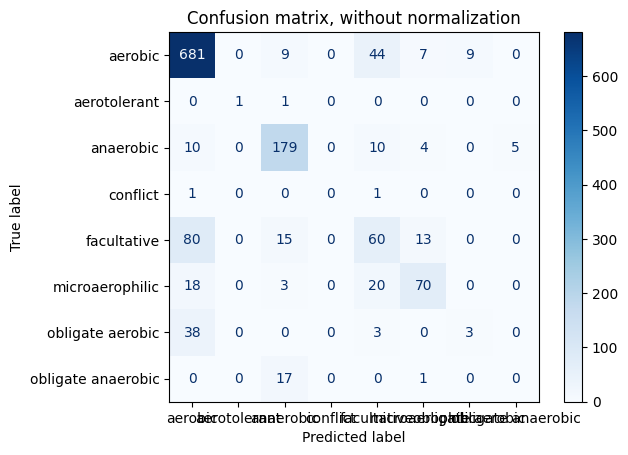

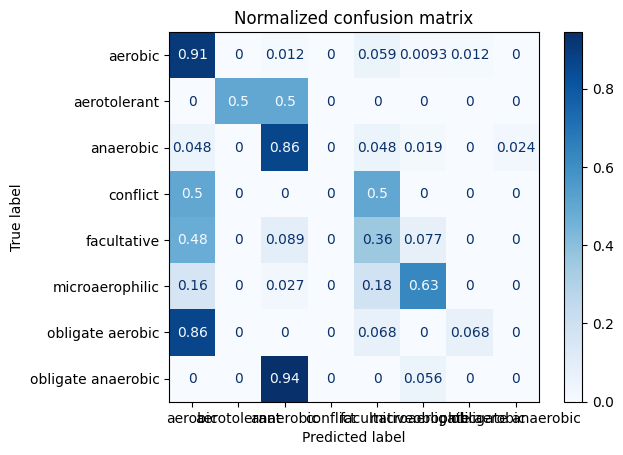

In [ ]:
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
titles_options = [
    ("Confusion matrix, without normalization", None),
    ("Normalized confusion matrix", "true"),
]
for title, normalize in titles_options:
    disp = ConfusionMatrixDisplay.from_estimator(
        clf,
        X_test,
        Y_test,
        cmap=plt.cm.Blues,
        normalize=normalize,
    )
    disp.ax_.set_title(title)

    print(title)
    print(disp.confusion_matrix)

plt.show()